# Problem Set 2
### Jonas Katona
#### Math 228B
#### Professor Per-Olof Persson
**Note:** I used Julia 1.0.0 for this problem set.

## Problem 1
**Part (a)**

Look at my problem set 1.

**Part (b)**

We can return back to our familiar finite-difference scheme for modeling diffusion with decay from part (a):

$$U^{n+1}_{j}=U^{n}_{j}+\frac{k\kappa}{2h^{2}}\left[U^{n}_{j-1}-2U^{n}_{j}+U^{n}_{j+1}+U^{n+1}_{j-1}-2U^{n+1}_{j}+U^{n+1}_{j+1}\right]-k\gamma\left[(1-\theta)U^{n}_{j}+\theta U^{n+1}_{j}\right]\quad(1)
\\ \kappa,\gamma,k,h>0\quad(2)$$

To test for stability using von Neumann analysis, we consider the growth of some wave-like grid function $u\left(x,t_{n}\right)=e^{ijh\xi}$ under the scheme outlined in $(1)$, where $\xi$ is a constant and $j$ is a spatial index. $u\left(x,t_{n}\right)$ should be an eigenfunction for our finite difference operator, and we write out $(1)$ in terms of it.

$$
U^{n}_{j-1}=e^{i(j-1)h\xi},\hspace{0.1cm}
U^{n}_{j}=e^{ijh\xi},\hspace{0.1cm}
U^{n}_{j+1}=e^{i(j+1)h\xi},\hspace{0.1cm}
U^{n+1}_{j-1}=g\left(\xi\right)e^{i(j-1)h\xi},\\
U^{n+1}_{j}=g\left(\xi\right)e^{ijh\xi},\hspace{0.1cm}
U^{n+1}_{j+1}=g\left(\xi\right)e^{i(j+1)h\xi} \quad(3)
$$

$g\left(\xi\right)$, also known as the *amplication factor*, is some arbitrary function which essentially represents the eigenvalue corresponding to our eigenfunction for the finite difference operator, which we get after timestepping once. Substituting $(3)$ into $(1)$, we get

$$
g\left(\xi\right)e^{ijh\xi}=e^{ijh\xi}+\frac{k\kappa}{2h^{2}}\left[e^{i(j-1)h\xi}-2e^{ijh\xi}+e^{i(j+1)h\xi}+g\left(\xi\right)\left(e^{i(j-1)h\xi}-2e^{ijh\xi}+e^{i(j+1)h\xi}\right)\right]-k\gamma\left[(1-\theta)e^{ijh\xi}+\theta g\left(\xi\right)e^{ijh\xi}\right] 
$$

and through dividing out the eigenfunction (grid function),

$$
g\left(\xi\right)=1+\frac{k\kappa}{2h^{2}}\left[e^{-ih\xi}-2+e^{ih\xi}+g\left(\xi\right)\left(e^{-ih\xi}-2+e^{ih\xi}\right)\right]-k\gamma\left[(1-\theta)+\theta g\left(\xi\right)\right] 
$$

Finally, noting that $\cos{(h\xi)}=\frac{e^{ih\xi}+e^{-ih\xi}}{2}$ from Euler's formula, we can solve for the amplification factor, $g\left(\xi\right)$.

$$
g\left(\xi\right)=\frac{1+\frac{k\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)-(1-\theta)k\gamma}{1-\frac{k\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)+k\gamma\theta} \quad(4)
$$

For von Neumann stability, we need $\left\vert g\left(\xi\right) \right\vert\leq1\Rightarrow-1\leq g\left(\xi\right)\leq1$, since this would indicate that, with successive timesteps, our finite-difference scheme will not amplify certain frequencies or modes in our system. Imposing this inequality on $(4)$, we get two inequalities which must be satisfied simultaneously:

$$\frac{1+\frac{k\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)-(1-\theta)k\gamma}{1-\frac{k\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)+k\gamma\theta}\leq1 \quad AND \quad \frac{1+\frac{k\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)-(1-\theta)k\gamma}{1-\frac{k\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)+k\gamma\theta}\geq-1 \Rightarrow
1+\frac{k\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)-(1-\theta)k\gamma\leq1-\frac{k\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)+k\gamma\theta\quad AND \\ 1+\frac{k\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)-(1-\theta)k\gamma\geq-1+\frac{k\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)-k\gamma\theta\quad \\ \Rightarrow \frac{2\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)\leq \gamma \quad AND \quad 2\geq(1-2\theta)k\gamma \quad(5)
$$

I now claim that the left equation in $(5)$ is always true, given that $\kappa,\gamma>0$ (which is stated in the problem, anyways). Why is this true? From what we know about the codomain of trigonometric functions, $\cos{(h\xi)}\geq-1\Rightarrow\cos{(h\xi)}-1\geq-2\hspace{0.1cm}\forall h\xi\in\mathbb{R}$. Therefore, 

$$
\frac{2\kappa}{h^{2}}(-2)\leq\frac{2\kappa}{h^{2}}\left(\cos{(h\xi)}-1\right)\leq\gamma\Rightarrow-\frac{4\kappa}{h^{2}}\leq\gamma
$$

However, by $(2)$, the right side of this inequality must always be greater than zero, while the left side must always be less than zero. Therefore, since this is always true, the only meaningful condition for determining von Neumann stability would be the right inequality in $(5)$, which reduces down to 

$$
\left(\frac{1}{2}-\theta\right)k\gamma\leq1\quad(6)
$$

(Note that this implies that the stability of our method is independent of our value for $h$.) Using a similar argument, because of $(2)$ again, $k\gamma>0$. Thus, if $\theta\geq\frac{1}{2}$, then $\frac{1}{2}-\theta\leq0\Rightarrow\left(\frac{1}{2}-\theta\right)k\gamma\leq0\leq 1$, which means that both inequalities in $(5)$ are satisfied regardless of the values of $k$ and $h$. Therefore, when $\theta\geq\frac{1}{2}$, this finite-difference scheme is unconditionally stable.$\boxed{}$

**Part (c)**

We return back to equation $(6)$ from part (b), which we determined was the only inequality that needed to be met for this scheme to be von Neumann stable (given that $(2)$ holds). Then, if we suppose now that $\theta=0$, our condition for stability for our method is that

$$
\left(\frac{1}{2}-\theta\right)k\gamma=\left(\frac{1}{2}-0\right)k\gamma\leq1\Rightarrow\frac{k\gamma}{2}\leq1\Rightarrow\boxed{\therefore k\leq\frac{2}{\gamma}}
$$

as desired.$\boxed{}$ 

## Problem 2
**Part (a)**

We are looking at the advection PDE (so for $a>0$)

$$u_{t}+au_{x}=0 \quad(1)$$

as approximated by the following *skewed leapfrog* method:

$$U^{n+1}_{j}=U^{n-1}_{j-2}-\left(\frac{ak}{h}-1\right)\left(U^{n}_{j}-U^{n}_{j-2}\right)\quad(2)$$

As usual, we look at the local truncation error (LTE) from this scheme by looking at the multivariable Taylor expansions (in time and position) of $U(x,t)$ about $U^{n}_{j}\equiv U(x_{j},t_{n})$ at the grid points used in $(2)$. For shorthand, we will let $U^{n}_{j}:=U$. We also note the grid in position and time: $t_{i+1}-t_{i}=k\hspace{0.1cm}\forall i$ and $x_{i+1}-x_{i}=h\hspace{0.1cm}\forall i$.

Starting off, we keep calm and take the necessary expansions. Note that we define $O(4):=+O\left(k^{4}\right)+O\left(k^{3}h\right)+O\left(k^{2}h^{2}\right)+O\left(kh^{3}\right)+O\left(h^{4}\right)$ (i.e. $O(4)$ refers to all fourth-order terms of our Taylor expansions in $k$ and $h$).
$$
U^{n+1}_{j}=U+kU_{t}+\frac{k^{2}}{2}U_{tt}+\frac{k^{3}}{6}u_{ttt}+O(4)\quad(3)\\
U^{n}_{j-2}=U-2hU_{x}+\frac{\left(-2h\right)^2}{2}U_{xx}+\frac{\left(-2h\right)^3}{6}U_{xxx}+O(4)\quad(4)\\
U^{n-1}_{j-2}=U+\left[U_{t}\left(t_{n-1}-t_{n}\right)+U_{x}\left(x_{j-2}-x_{j}\right)\right]+\frac{1}{2}\left[U_{tt}\left(t_{n-1}-t_{n}\right)^{2}+2U_{xt}\left(t_{n-1}-t_{n}\right)\left(x_{j-2}-x_{j}\right)+U_{xx}\left(x_{j-2}-x_{j}\right)^{2}\right]+\frac{1}{6}\left[U_{ttt}\left(t_{n-1}-t_{n}\right)^{3}+3U_{xtt}\left(t_{n-1}-t_{n}\right)^{2}\left(x_{j-2}-x_{j}\right)+3U_{xxt}\left(t_{n-1}-t_{n}\right)\left(x_{j-2}-x_{j}\right)^{2}+U_{xxx}\left(x_{j-2}-x_{j}\right)^{3}\right]+O(4) \\
\Rightarrow U^{n-1}_{j-2}=U-kU_{t}-2hU_{x}+\frac{k^{2}}{2}U_{tt}+2hkU_{xt}+2h^{2}U_{xx}-\frac{k^{3}}{6}U_{ttt}-k^{2}hU_{ttx}-2kh^{2}U_{txx}-\frac{4}{3}h^{3}U_{xxx}+O(4)\quad(5)
$$

Now, we can substitute $(3)-(5)$ into $(2)$ and look at the remainder.

$$
U^{n-1}_{j-2}-\left(\frac{ak}{h}-1\right)\left(U^{n}_{j}-U^{n}_{j-2}\right)-U^{n+1}_{j}=0\\
\Rightarrow U-kU_{t}-2hU_{x}+\frac{k^{2}}{2}U_{tt}+2hkU_{xt}+2h^{2}U_{xx}-\frac{k^{3}}{6}U_{ttt}-k^{2}hU_{xtt}-2kh^{2}U_{xxt}-\frac{4}{3}h^{3}U_{xxx}-\left(\frac{ak}{h}-1\right)\left(U-\left(U-2hU_{x}+2h^{2}U_{xx}-\frac{4}{3}h^{3}U_{xxx}+O(4)\right)\right)-U-kU_{t}-\frac{k^{2}}{2}U_{tt}-\frac{k^{3}}{6}U_{ttt}+O(4)=0\\
\Rightarrow 2hkU_{xt}+2h^{2}U_{xx}-k^{2}hU_{xtt}-2kh^{2}U_{xxt}-\frac{4}{3}h^{3}U_{xxx}+\left(1-\frac{ak}{h}\right)\left(2hU_{x}-2h^{2}U_{xx}+\frac{4}{3}h^{3}U_{xxx}+O(4)\right)-2kU_{t}-2hU_{x}-\frac{k^{3}}{3}U_{ttt}=0\\
\Rightarrow 2hkU_{xt}-k^{2}hU_{xtt}-2kh^{2}U_{xxt}-2akU_{x}+2akhU_{xx}-\frac{4}{3}akh^{2}U_{xxx}-2kU_{t}-\frac{k^{3}}{3}U_{ttt}+O(4)=0\quad(6)
$$

From here, we group the terms in $(6)$ by orders of $k$ and $h$, because we know that these must vanish separately.

$$
k\left(-2aU_{x}-2U_{t}\right)+h(0)+hk\left(2U_{xt}+2aU_{xx}\right)+h^{2}(0)+k^{2}(0)+kh^{2}\left(-2U_{xxt}-\frac{4}{3}aU_{xxx}\right)+k^{2}hU_{xtt}+k^{3}\frac{U_{ttt}}{3}+O(4)=0\\
\Rightarrow -2k\left(aU_{x}+U_{t}\right)+2hk\left(U_{xt}+aU_{xx}\right)-2kh^{2}\left(U_{xxt}+\frac{2}{3}aU_{xxx}\right)+k^{2}hU_{xtt}+k^{3}\frac{U_{ttt}}{3}+O(4)=0\quad(7)
$$

By $(1)$, we know that the $O(k)$ term in $(7)$ vanishes immediately. Furthermore, by differentiating $(1)$ successively with respect to $x$, we find that $aU_{xx}=-U_{xt}\Rightarrow aU_{xxx}=-U_{xxt}$, which means that the $O(hk)$ term also vanishes, and the $O\left(kh^{2}\right)$ term can be simplified as $U_{xxt}+\frac{2}{3}aU_{xxx}=U_{xxt}-\frac{2}{3}U_{xxt}=\frac{U_{xxt}}{3}$. From here, $(7)$ gives us

$$
-\frac{2}{3}kh^{2}U_{xxt}+k^{2}hU_{xtt}+k^{3}\frac{U_{ttt}}{3}+O(4)=0\quad(8)
$$

Therefore, by $(8)$, the LTE for our scheme is $\boxed{-\frac{2}{3}kh^{2}U_{xxt}+k^{2}hU_{xtt}+k^{3}\frac{U_{ttt}}{3}+O(4)}$, which makes our scheme third-order accurate in time and space.$\boxed{}$

**Part (b)**

For the advection equation, we know that $U(X,T)$ (i.e. the set of all solution values) only depends off of the initial data $U_{0}(X-aT)$. Therefore, the domain of dependence (i.e. the only region on which we should have a solution) will be $\{X-aT\}$. Our scheme should *at least* contain the true domain of dependence to be accurate, and our scheme calculates $U^{n+1}_{j}$ using grid points which are left by two spatial grid points, and none to the right. Thus, $X-\frac{2hT}{k}\leq X-aT\leq X\Rightarrow\boxed{0\leq\frac{ak}{h}\leq 2}$. $\boxed{}$

**Part (c)**

As in problem 1(b) (I will not explain the motivation for many of the steps here, because it is explained there), to test for stability using von Neumann analysis, we consider the growth of $u\left(x,t_{n}\right)=e^{ijh\xi}$ under the scheme outlined in $(2)$. $u\left(x,t_{n}\right)$ should be an eigenfunction for our finite difference operator. 

$$
U^{n-1}_{j-2}=\frac{1}{g\left(\xi\right)}e^{i(j-2)h\xi},\hspace{0.1cm}
U^{n}_{j-2}=e^{i(j-2)h\xi},\hspace{0.1cm}
U^{n}_{j}=e^{ijh\xi},\hspace{0.1cm}
U^{n+1}_{j}=g\left(\xi\right)e^{ijh\xi}\quad(9)
$$

Substituting $(9)$ into $(2)$, we write out $(2)$ in terms of our eigenfunction, $e^{ijh\xi}$.

$$
g\left(\xi\right)e^{ijh\xi}=\frac{1}{g\left(\xi\right)}e^{i(j-2)h\xi}-\left(\frac{ak}{h}-1\right)\left(e^{ijh\xi}-e^{i(j-2)h\xi}\right) \Rightarrow g\left(\xi\right)e^{ijh\xi}-\frac{1}{g\left(\xi\right)}e^{i(j-2)h\xi}+\left(\frac{ak}{h}-1\right)\left(e^{ijh\xi}-e^{i(j-2)h\xi}\right)=0\quad(10)
$$

We then multiply both sides of $(10)$ by $g\left(\xi\right)e^{i(1-j)h\xi}$, giving us

$$
\left(g\left(\xi\right)\right)^{2}e^{ih\xi}-e^{-ih\xi}+g\left(\xi\right)\left(\frac{ak}{h}-1\right)\left(e^{ih\xi}-e^{-ih\xi}\right)=0
$$

and noting furthermore that $e^{ih\xi}-e^{-ih\xi}\equiv 2i\sin\left(h\xi\right)$,

$$
e^{ih\xi}\left(g\left(\xi\right)\right)^{2}+2i\left(\frac{ak}{h}-1\right)\sin\left(h\xi\right)g\left(\xi\right)-e^{-ih\xi}=0\quad(11)
$$

For von Neumann stability, we require that $\left\vert g\left(\xi\right) \right\vert\leq1$. Fortunately, $(11)$ gives us a quadratic equation for $g\left(\xi\right)$, the solution of which is

$$
g\left(\xi\right)=\frac{2i\sin\left(h\xi\right)\left(1-\frac{ak}{h}\right)\pm\sqrt{-4\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}-4\left(e^{ih\xi}\right)\left(-e^{-ih\xi}\right)}}{2e^{ih\xi}}=\frac{2i\sin\left(h\xi\right)\left(1-\frac{ak}{h}\right)\pm2\sqrt{1-\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}}}{2e^{ih\xi}}\\
\Rightarrow g\left(\xi\right)=e^{-ih\xi}\left(i\sin\left(h\xi\right)\left(1-\frac{ak}{h}\right)\pm\sqrt{1-\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}}\right)\quad(12)$$

Depending on the sign of the discriminant, we have two cases. If $\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}\leq 1$, then the discriminant is positive, so the square root in $(12)$ is real. In that case,

$$
\left|g\left(\xi\right)\right|=\left|e^{-ih\xi}\right|\left|i\sin\left(h\xi\right)\left(1-\frac{ak}{h}\right)\pm\sqrt{1-\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}}\right|=\sqrt{\left(\sin\left(h\xi\right)\left(1-\frac{ak}{h}\right)\right)^{2}+\left(\pm\sqrt{1-\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}}\right)^{2}}\\
\Rightarrow \left|g\left(\xi\right)\right|=\sqrt{\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}+1-\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}}=1\Rightarrow\boxed{\left|g\left(\xi\right)\right|=1}\quad(13)
$$

Thus, by $(13)$, the scheme will be von Neumann stable, given that we choose an appropriate $k$ and $h$ such that the discriminant is positive. On the other hand, if $\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}>1$, then the discriminant is negative, so the square root is negative. In that case, we actually have two values for $g$, namely

$$
\left|g\left(\xi\right)\right|=\left|e^{-ih\xi}\right|\left|i\sin\left(h\xi\right)\left(1-\frac{ak}{h}\right)\pm i\sqrt{\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}-1}\right|=\left|\sin\left(h\xi\right)\left(1-\frac{ak}{h}\right)\pm \sqrt{\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}-1}\right|\quad(14)
$$

However, for $\sin\left(h\xi\right)\left(1-\frac{ak}{h}\right)>1$, the magnitude of the positive root for $g$ will be greater than 1, while for $\sin\left(h\xi\right)\left(1-\frac{ak}{h}\right)<-1$, the magnitude of the negative root will be greater than 1 (one can check this graphically). In either case, we cannot win, so we conclude that if $\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}>1$, our scheme cannot be von Neumann stable. 

We resort to the other case; namely, when $\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}\leq 1$. For stability, we require that $\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}\leq 1$ for *all* values of $\xi$. Also, $\sin$ is bounded above by $1$ and below by $-1$, so certainly, $\sin^{2}$ is bounded above by $1$. Therefore, since $\sin^{2}\left(h\xi\right)\left(1-\frac{ak}{h}\right)^{2}\leq\left(1-\frac{ak}{h}\right)^{2}\hspace{0.15cm}\forall\xi$, this means that we ought to have $\left(1-\frac{ak}{h}\right)^{2}\leq 1\Rightarrow\left|1-\frac{ak}{h}\right|\leq 1\Rightarrow\boxed{0\leq\frac{ak}{h}\leq 2}$. Thus, the range we posited as satisfying the CFL condition in problem 2(b) is in fact stable as well, as desired.$\boxed{}$

## Problem 3
We want to find a numerical solution on a square domain to Euler's equations of compressible gas dynamics in two space dimensions:

$$
u_{t}+\nabla\cdot F=0,\quad u=\begin{bmatrix} \rho \\ \rho u \\ \rho v \\ \rho E \end{bmatrix},\quad F=\begin{bmatrix} \rho u & \rho v \\ \rho u^{2}+p & \rho u v \\ \rho u v & \rho v^{2}+p \\ u\left(\rho E+p\right) & v\left(\rho E+p\right) \end{bmatrix}
$$

For an ideal gas, $p=\left(\gamma-1\right)\rho\left(E-\frac{u^{2}+v^{2}}{2}\right)$, and we will assume in this case that $\gamma=\frac{7}{5}$ (as is for a diatomic gas).

**Part (a)**

We start off by writing a function which returns the components of $F$, the flux functions, given the components of $u$.

In [1]:
function euler_fluxes(r, ru, rv, rE) 
    γ = 7 / 5
    u = @. ru / r
    v = @. rv / r
    p = @. (γ - 1) * r * ((rE / r) - 0.5 * (u ^ 2 + v ^ 2)) #E = rE / r
    Frx = ru
    Fry = rv
    Frux = @. (ru * u) + p
    Fruy = @. ru * v
    Frvx = Fruy
    Frvy = @. (rv * v) + p
    FrEx = @. u * (rE + p)
    FrEy = @. v * (rE + p)
    return Frx, Fry, Frux, Fruy, Frvx, Frvy, FrEx, FrEy
end

euler_fluxes (generic function with 1 method)

**Part (b)**

Next, we write a function which can numerically calculate $\nabla\cdot F=\nabla\cdot \left[F_{x},F_{y}\right]=\frac{\partial F_{x}}{\partial x}+\frac{\partial F_{y}}{\partial y}$, given $F_{x}$ and $F_{y}$. We calculate each of these partial derivatives using the 4th-order compact Padé scheme, assuming a uniform grid spacing in either spatial directions of $h$:

$$
f^{'}_{i-1}+4f^{'}_{i}+f^{'}_{i+1}=\frac{3}{h}\left(f_{i+1}-f_{i-1}\right)\quad(1)
$$

$(1)$ can be solved using a matrix equation; just replace $f$ with each column or row of $F_{x}$ or $F_{y}$, respectively. (The left side yields a symmetric tridiagonal matrix, while the right side yields an antisymmetric tridiagonal matrix multiplied into $\overrightarrow{f}$.) 

To impose periodic boundary conditions on a grid function defined for a grid with $n$ points, we set that $f_{0}=f_{n}$ and $f_{n+1}=f_{1}$. In our case, we just need to impose these conditions as we take the partial derivatives of the components of $F$ in each of their respective directions.

In [2]:
using LinearAlgebra

function compact_div(Fx, Fy, h)
    n = length(Fx[:, 1]) #assume that we have a square grid with equal spacing in both directions
    
    #create matrix system for 4th order compact Padé scheme
    LHS = spdiagm(0 => 4 * ones(n), 1 => ones(n - 1))
    RHS = spdiagm(-1 => -3 / h * ones(n - 1), 1 => 3 / h * ones(n - 1))
    #impose periodic boundary conditions
    LHS[1, n] = 1
    LHS = Symmetric(LHS)
    RHS[1, n] = -3 / h
    RHS[n, 1] = 3 / h
    #convert sparse matrix into regular matrix, because Julia can't solve matrix equations with sparse matrices yet
    RHS = Matrix(RHS)

    #calculate the divergence for each column of Fx and each row of Fy separately
    DFx = zeros(n, n)
    DFy = zeros(n, n)
    for i = 1 : n
        DFx[:, i] = LHS \ (RHS * Fx[:, i])
        DFy[i, :] = LHS \ (RHS * Fy[i, :]) 
    end
    divF = DFx + DFy
    return divF
end

compact_div (generic function with 1 method)

**Part (c)**

We also introduce a filter for our grid solution of $u$; namely, we want to use the 6th-order compact filter with filtering parameter $\alpha$:

$$
\alpha\hat{u}_{i-1}+\hat{u}_{i}+\alpha\hat{u}_{i+1}=au_{i}+\frac{b}{2}\left(u_{i+1}+u_{i-1}\right)+\frac{c}{2}\left(u_{i+2}+u_{i-2}\right)\quad(2)
$$

where $a=\frac{3}{4}\alpha+\frac{5}{8}$, $b=\alpha+\frac{1}{2}$, and $c=\frac{\alpha}{4}-\frac{1}{8}$. $(2)$ can also be solved using a matrix equation, whence the left side yields a symmetric tridiagonal matrix, and the right side a symmetric pentadiagonal matrix.

In [3]:
using LinearAlgebra
using SparseArrays

function compact_filter(u, α)
    #define necessary constants
    a = 3 * α / 4 + 5 / 8
    b = α + 1 / 2
    c = α / 4 - 1 / 8
    n = length(u[:, 1, 1]) #again, assume a square grid with equal spacing in both directions
    
    #create matrix system for the 6th-order compact filter
    LHS = SymTridiagonal(ones(n), α * ones(n - 1));
    RHS = Symmetric(spdiagm(0 => a * ones(n), 1 => b / 2 * ones(n - 1), 2 => c / 2 * ones(n - 2)))
    
    #filter each component of u (sequentially, we first filter all of the x-directions, then the y-directions)
    for k = 1 : 4 #loop through each component of u, each of which is a matrix (rank 2 tensor)
        for i = 1 : n
            u[i, :, k] = LHS \ (RHS * u[i, :, k])
        end
        for j = 1 : n
            u[:, j, k] = LHS \ (RHS * u[:, j, k])
        end
    end
    return u
end

compact_filter (generic function with 1 method)

**Part (d)**

For our convenience, we write code which will compute the right-hand side of our discretized, numerical solution to $-\nabla\cdot F$, using our results to parts (a) and (b).

In [4]:
function euler_rhs(r, ru, rv, rE, h)
    Frx, Fry, Frux, Fruy, Frvx, Frvy, FrEx, FrEy = euler_fluxes(r, ru, rv, rE)
    fr = -compact_div(Frx, Fry, h)
    fru = -compact_div(Frux, Fruy, h)
    frv = -compact_div(Frvx, Frvy, h)
    frE = -compact_div(FrEx, FrEy, h)
    return fr, fru, frv, frE
end

euler_rhs (generic function with 1 method)

**Part (e)**

In time, this is an IVP of the form $\dot{\overrightarrow{u(t)}}=-\overrightarrow{\nabla\cdot F}$ (the divergence of a matrix will return a vector) with initial condition $\overrightarrow{u(t_{0})}:=\overrightarrow{u_{0}}$, a general RK4 scheme is defined as the following, with stepsize $k:=t_{n+1}-t_{n} \forall n$ chosen beforehand:

$$
\overrightarrow{u_{n+1}}=\overrightarrow{u_{n}}+\frac{k}{6}\left(\overrightarrow{k_{n,1}}+2\overrightarrow{k_{n,2}}+2\overrightarrow{k_{n,3}}+\overrightarrow{k_{n,4}}\right)
$$

where each $\overrightarrow{k_{n,j}}$ is defined $\forall j \in \{1, 2, 3, 4\}$ as:

$$
\overrightarrow{k_{n,1}}=\overrightarrow{f}\left(t_{n}, \overrightarrow{u_{n}}\right) \\
\overrightarrow{k_{n,2}}=\overrightarrow{f}\left(t_{n}+\frac{k}{2}, \overrightarrow{u_{n}}+\frac{k}{2}\overrightarrow{k_{n,1}}\right) \\
\overrightarrow{k_{n,3}}=\overrightarrow{f}\left(t_{n}+\frac{k}{2}, \overrightarrow{u_{n}}+\frac{k}{2}\overrightarrow{k_{n,2}}\right) \\
\overrightarrow{k_{n,4}}=\overrightarrow{f}\left(t_{n}+k, \overrightarrow{u_{n}}+k\overrightarrow{k_{n,3}}\right) 
$$

Thus, accordingly, we can use the RK4 method to numerically solve our IVP in question, applpying the 6th-order compact filter from part (c). We code this for one timestep below:

In [5]:
function euler_rk4step(r, ru, rv, rE, h, k, α)
    #RK4 
    ui = zeros(length(r[1, :]), length(r[:, 1]), 4) #create rank 3 tensor to store the components of u
    k1 = zeros(length(r[1, :]), length(r[:, 1]), 4) #"" k1
    k2 = zeros(length(r[1, :]), length(r[:, 1]), 4) #"" k2
    k3 = zeros(length(r[1, :]), length(r[:, 1]), 4) #"" k3
    k4 = zeros(length(r[1, :]), length(r[:, 1]), 4) #"" k4
    ui[:, :, 1] = r 
    ui[:, :, 2] = ru
    ui[:, :, 3] = rv
    ui[:, :, 4] = rE
    fr, fru, frv, frE = euler_rhs(r, ru, rv, rE, h) 
    k1[:, :, 1] = fr 
    k1[:, :, 2] = fru
    k1[:, :, 3] = frv
    k1[:, :, 4] = frE
    fr, fru, frv, frE = euler_rhs(r + 0.5 * k * fr, ru + 0.5 * k * fru, rv + 0.5 * k * frv, rE + 0.5 * k * frE, h)
    k2[:, :, 1] = fr 
    k2[:, :, 2] = fru
    k2[:, :, 3] = frv
    k2[:, :, 4] = frE
    fr, fru, frv, frE = euler_rhs(r + 0.5 * k * fr , ru + 0.5 * k * fru, rv + 0.5 * k * frv, rE + 0.5 * k * frE, h)
    k3[:, :, 1] = fr 
    k3[:, :, 2] = fru
    k3[:, :, 3] = frv
    k3[:, :, 4] = frE
    fr, fru, frv, frE = euler_rhs(r + k * fr, ru + k * fru, rv + k * frv, rE + k * frE, h)
    k4[:, :, 1] = fr 
    k4[:, :, 2] = fru
    k4[:, :, 3] = frv
    k4[:, :, 4] = frE
    u = ui + (k / 6) * (k1 + 2 * k2 + 2 * k3 + k4) #timestep
    
    #apply compact filter
    u = compact_filter(u, α)
    r = u[:, :, 1]
    ru = u[:, :, 2]
    rv = u[:, :, 3]
    rE = u[:, :, 4]
    return r, ru, rv, rE
end

euler_rk4step (generic function with 1 method)

**Part (f)**

In [6]:
function euler_vortex(x, y, time, pars)
    γ  = 1.4
    rc = pars[1]
    ϵ  = pars[2]
    M₀ = pars[3]
    θ  = pars[4]
    x₀ = pars[5]
    y₀ = pars[6]

    r∞ = 1
    u∞ = 1
    E∞ = 1/(γ*M₀^2*(γ - 1)) + 1/2
    p∞ = (γ - 1) * (E∞ - 1/2)
    ubar = u∞ * cos(θ)
    vbar = u∞ * sin(θ)
    f = @. (1 - ((x - x₀) - ubar*time)^2 - ((y - y₀) - vbar*time)^2) / rc^2

    u = @. u∞ * (cos(θ) - ϵ*((y - y₀)-vbar*time) / (2π*rc) * exp(f/2))
    v = @. u∞ * (sin(θ) + ϵ*((x - x₀)-ubar*time) / (2π*rc) * exp(f/2))
    r = @. r∞ * (1 - ϵ^2 * (γ - 1) * M₀^2/(8π^2) * exp(f))^(1/(γ-1))
    p = @. p∞ * (1 - ϵ^2 * (γ - 1) * M₀^2/(8π^2) * exp(f))^(γ/(γ-1))
    
    ru = @. r*u
    rv = @. r*v
    rE = @. p/(γ - 1) + 1/2 * (ru^2 + rv^2) / r
    
    r, ru, rv, rE
end

euler_vortex (generic function with 1 method)

In [7]:
function errorforpartf(n, α)
    #initial conditions
    pars = [0.5, 1, 0.5, pi/4, 2.5, 2.5]
    
    #set up spatial grid
    h = 10 / n
    s = 0 : h : 10
    x = repeat(s, 1, length(s))
    y = Matrix(x')

    #set up time grid
    T = 5sqrt(2)
    Nt = ceil(T / (0.3 * h))
    k = T / Nt
    tq = k * (1 : Nt)

    #timestep for the numerical solution
    r, ru, rv, rE  = euler_vortex(x, y, 0, pars)
    for i = 1 : Nt
        r, ru, rv, rE = euler_rk4step(r, ru, rv, rE, h, k, α)
    end

    #actual solution
    r0, ru0, rv0, rE0 = euler_vortex(x, y, T, pars)
    
    #create tensors for solutions u (computed) and u0 (actual)
    u = zeros(length(r[1, :]), length(r[:, 1]), 4)
    u0 = zeros(length(r[1, :]), length(r[:, 1]), 4)
    u[:, :, 1] = r
    u[:, :, 2] = ru
    u[:, :, 3] = rv
    u[:, :, 4] = rE
    u0[:, :, 1] = r0
    u0[:, :, 2] = ru0
    u0[:, :, 3] = rv0
    u0[:, :, 4] = rE0
    
    return norm(u - u0, Inf)
end

errorforpartf (generic function with 1 method)

To check the exact accuracy of our new scheme, we apply a grid refinement test, varying $h$ for the following values: $\frac{10}{32}$, $\frac{10}{64}$, $\frac{10}{96}$ (i.e. for $N=32,64,96$). (I would have used $N=128$ as suggested for the final $h$ value, but doing it with $N=96$ instead, the test already took around 30 minutes on my laptop, and I waited for around an hour trying to use $N=128$ with no success in the script loading.) The motivation behind the test goes a little bit like this. Suppose that the absolute error between our numerical solution, $u^{*}$, and the exact solution, $u$, is equal to $\vert\vert u-u^{*}\vert\vert=Ch^{p}$, where $C$ is some arbitrary constant dependent (at least in theory) on some higher-order partial derivatives of $u$, $h$ is the grid stepsize (which we take to be uniform), and $p$ we call the *order of convergence* (or alternatively, the *order of accuracy*). Then, naturally, by the properties of the logarithm, $\log\vert\vert u-u^{*}\vert\vert=\log C + p\log h$, so by graphing a log-log plot of the absolute error vs. the stepsize, the slope of the resulting line will give us $p$, as desired.

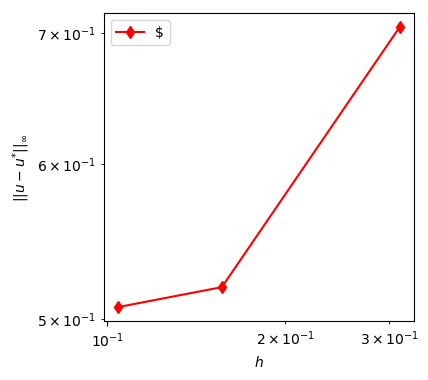

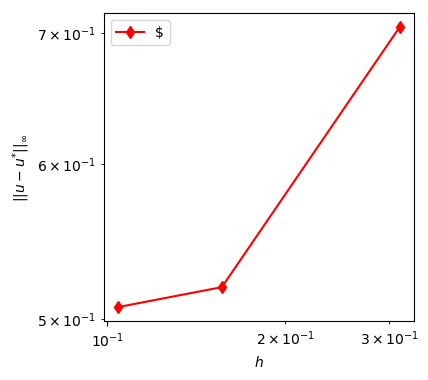

Slope for our scheme (α=0.499) 0.31523434626937497
Slope for our scheme (α=0.48) 0.31523434626937497


In [14]:
using PyPlot

pars = [0.5, 1, 0.5, pi/4, 2.5, 2.5] #initial conditions
nq = [32, 64, 96] #matrix of N values
errors1 = zeros(length(nq)) #matrix of errors
errors2 = errors1

#calculate errors and save them in error matrix
for i = 1 : length(nq)
    errors1[i] = errorforpartf(nq[i], 0.499)
    errors2[i] = errorforpartf(nq[i], 0.48)
end

#graph log-log plot for α=0.499
hq = 10 ./ nq
figure(1, figsize = (4, 4))
loglog(hq, errors1, "r-d", label = "RK4/4th-order Padé CTFD/6th-order compact filter")
xlabel(L"h")
ylabel(L"\vert\vert u-u^{*}\vert\vert_{\infty}")
legend(L"α=0.499")

#calculate slope for said log-log plot
n = length(nq)
logerrors = log.(errors1)
logh = log.(hq)
slope = (n * sum(logerrors .* logh) - sum(logerrors) * sum(logh)) / (n * sum(logh .^ 2) - sum(logh) ^ 2)
println("Slope for our scheme (α=0.499) ", slope)

#graph log-log plot for α=0.48
figure(2, figsize = (4, 4))
loglog(hq, errors2, "r-d", label = "RK4/4th-order Padé CTFD/6th-order compact filter")
xlabel(L"h")
ylabel(L"\vert\vert u-u^{*}\vert\vert_{\infty}")
legend(L"α=0.48")

#calculate slope for second log-log plot
logerrors = log.(errors2)
slope = (n * sum(logerrors .* logh) - sum(logerrors) * sum(logh)) / (n * sum(logh .^ 2) - sum(logh) ^ 2)
println("Slope for our scheme (α=0.48) ", slope)

As we can see, the order of convergence is rather hard to predict and does not appear linear, but I suspect that there might be a bug in my code which is causing this.

**Part (g)**

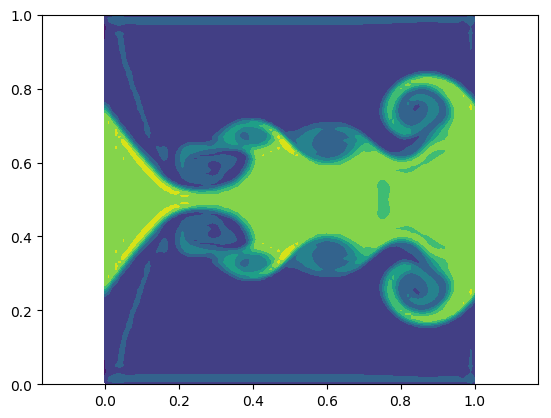

(0.0, 1.0, 0.0, 1.0)

In [9]:
using PyPlot

#set up spatial grid
N = 100
h = 1 / N
s = 0 : h : 1
x = repeat(s, 1, length(s))
y = Matrix(x')

#set up time grid
T = 1
Nt = ceil(T / (0.3 * h))
k = T / Nt
tq = k * (1 : Nt)

α = 0.48
γ = 7 / 5

#initial conditions
upperbound = @. 0.15 + sin(2 * pi * x) / 200
n = N + 1
r = zeros(n, n)
for i = 1 : n
    for j = 1 : n
        if abs(y[i, j] - 0.5) < upperbound[i, j]
            r[i, j] = 2
        else
            r[i, j] = 1
        end
    end
end
u = @. r - 1
v = zeros(n, n)
p = 3 * ones(n, n)
ru = @. r * u
rv = @. r * v
E = @. (p / ((γ - 1) * r)) + 0.5 * (u ^ 2 + v ^ 2)
rE = @. r * E

#timestep for the numerical solution
for i = 1 : Nt
    r, ru, rv, rE = euler_rk4step(r, ru, rv, rE, h, k, α)
end

#plot solution
clf()
contourf(x, y, Matrix(r))
axis("equal")

For this problem, I would have used the original suggested grid spacing of $N=256$, but doing so, I again waited over an hour for my code to run on my laptop, and it would not load. I apologize for that, again; perhaps, my implementation in one of my functions above was not super efficient. I instead used $N = 100$.